In [ ]:
import pandas as pd
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import tensorflow as tf
tf.__version__
warnings.filterwarnings('ignore')

In [ ]:
credit_df=pd.read_csv('credit_card_bills.csv')
credit_df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,37,0,0,2,0,0,...,19616.0,19228.0,19878.0,3200.0,0.0,830.0,750.0,1000.0,282.0,1
1,500000.0,1,2,2,26,0,0,0,0,0,...,130136.0,127699.0,124623.0,6005.0,6005.0,6094.0,4161.0,5021.0,4350.0,0
2,150000.0,1,1,2,26,-2,-1,0,0,-1,...,2360.0,70.0,420.0,360.0,1041.0,1000.0,70.0,660.0,0.0,0
3,60000.0,2,2,1,36,0,0,0,0,0,...,41241.0,29534.0,29297.0,2000.0,3042.0,1433.0,1012.0,1029.0,1074.0,1
4,220000.0,1,1,2,29,0,0,0,0,0,...,23965.0,23865.0,23667.0,1410.0,1417.0,1333.0,731.0,1019.0,1045.0,0


In [ ]:
print(credit_df.columns)
print(len(credit_df.columns))

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
24


In [ ]:
#Removing Unwanted categorical levels as mentioned in data exploration
credit_df['EDUCATION'].value_counts()

2    4681
1    3496
3    1675
5      98
4      36
6      11
0       3
Name: EDUCATION, dtype: int64

## Data Preprocessing Steps

In [ ]:
credit_df["EDUCATION"]=credit_df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_df["MARRIAGE"]=credit_df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [ ]:
X=credit_df.drop(['default.payment.next.month'],axis=1)

In [ ]:
y=credit_df['default.payment.next.month']

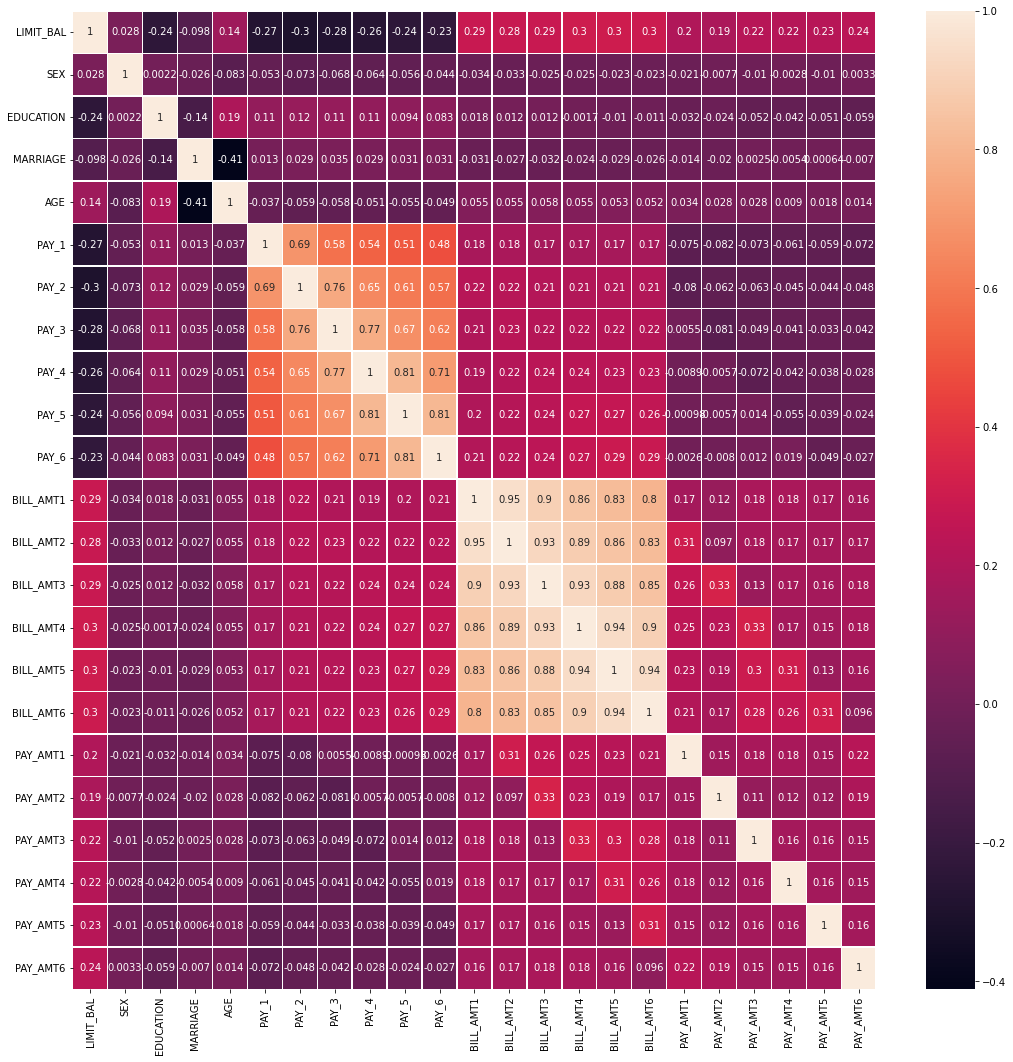

In [ ]:
fig, ax = plt.subplots(figsize=(18,18))    
sns.heatmap(X.corr(), annot=True, linewidths=.5, ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size = 0.2,random_state =2)

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  82.1
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1557
           1       0.67      0.38      0.48       443

    accuracy                           0.82      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.80      0.82      0.80      2000



In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.8215, 0.82  , 0.825 , 0.821 , 0.827 ])

In [ ]:
# Gausian Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.377
              precision    recall  f1-score   support

           0       0.90      0.22      0.36      1557
           1       0.25      0.91      0.39       443

    accuracy                           0.38      2000
   macro avg       0.58      0.57      0.38      2000
weighted avg       0.76      0.38      0.37      2000



In [ ]:
# SVM
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8215
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1557
           1       0.71      0.33      0.45       443

    accuracy                           0.82      2000
   macro avg       0.77      0.64      0.67      2000
weighted avg       0.81      0.82      0.79      2000



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.777
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1557
           1       0.00      0.00      0.00       443

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.68      2000



In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.81
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1557
           1       0.63      0.35      0.45       443

    accuracy                           0.81      2000
   macro avg       0.73      0.65      0.67      2000
weighted avg       0.79      0.81      0.79      2000



In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier().fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

XGBoost's Accuracy is:  0.8205


# Artificial Neural Networks

In [ ]:
# initalizing the ANN as a sequence of layers
ann = tf.keras.models.Sequential()

# adding first layer of neurons
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
# dense layer as in a fully connected layer i guess
# one neuron per one input feature
# no thumb rule for number of neurons per layer
# its purely experimentation
# tried several numbers...6 was good
# activation function...rectifier...as told in intuition..its an important function

ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# only one neuron to get input
# binary output...so sigmoid
# if we have three classes in input rather than two as per given problem
# then we can have three neurons..one hot encode of the output value
# sigmoid function gives probability of 1 or 0

# optimizer...best one is adam..the best one to perform stochastic gradietnt descent
# optmizer updates the weights..(adam fucntion through stochastic gradient descent)
# loss fucntion...wen ur doing binary classification loss fucntion must always be the given one
# for non binary...replace binary with categorical..in the given parameter
# ANN for regresion...see their free course
# can take several value of metrics thats y there is a list
# accurracy is the main one..hence took it..we want more accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# no of rows to use current weights on before adjusting the weights after comparision is the batch size
# can choose any number for apochs..but ya make sure its some big number like 100 atleast
ann.fit(Xtrain, Ytrain, batch_size = 32, epochs = 100)

Epoch 1/100
750/750 [==============================] - 4s 3ms/step - loss: 646.4993 - accuracy: 0.6680
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 86.0198 - accuracy: 0.6872
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 54.2045 - accuracy: 0.6836
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 31.9970 - accuracy: 0.6801
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 24.4364 - accuracy: 0.6662
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 23.3326 - accuracy: 0.6267
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 18.0998 - accuracy: 0.6290
Epoch 8/100
750/750 [==============================] - 1s 2ms/step - loss: 15.7593 - accuracy: 0.7172
Epoch 9/100
750/750 [==============================] - 1s 2ms/step - loss: 15.9011 - accuracy: 0.7231
Epoch 10/100
750/750 [==============================] - 1s 2ms/step - loss: 13.51

In [ ]:
acc.append(accuracy_score(Ytest, y_pred))
model.append('ANN')

# Accuracy Comparision

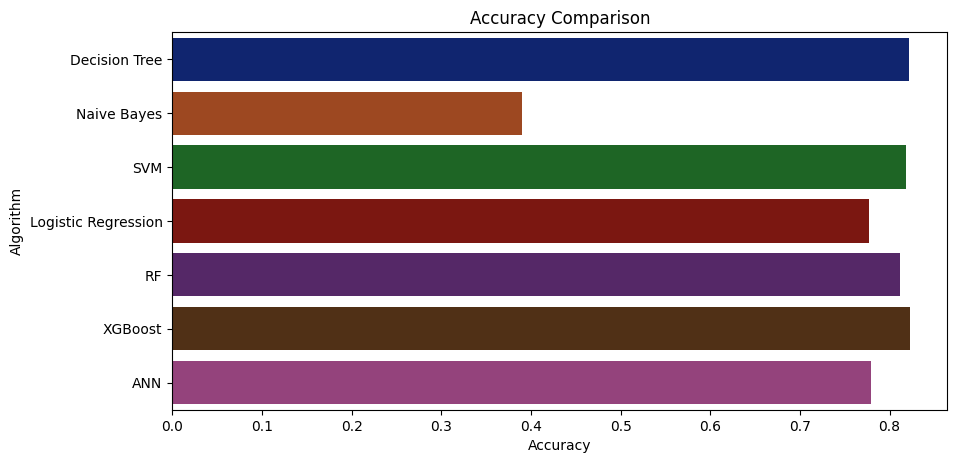

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.822
Naive Bayes --> 0.39
SVM --> 0.8185
Logistic Regression --> 0.7775
RF --> 0.8115
XGBoost --> 0.8231666666666667
ANN --> 0.7792


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 3.3 MB/s 


In [ ]:
import shap

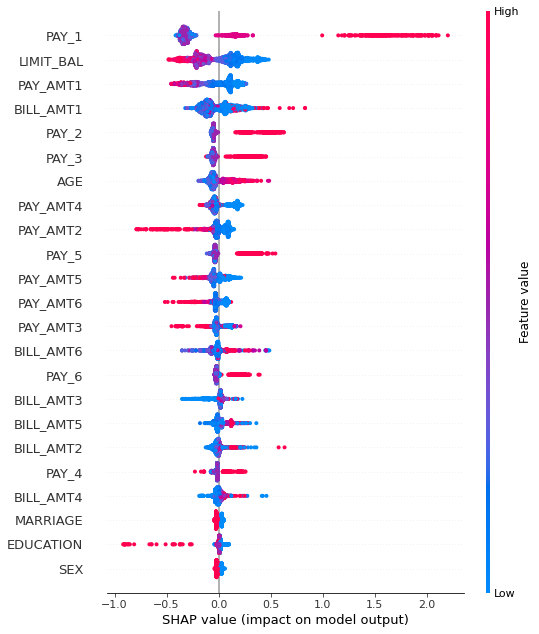

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(XB)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(Xtest)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, Xtest, max_display=Xtest.shape[1])

In [ ]:
shap_values[1]

array([ 0.38741216,  0.01234391,  0.00690418, -0.03086256,  0.12929635,
       -0.30568042, -0.04188757, -0.05409089, -0.01615774, -0.02944774,
       -0.02599898, -0.1678188 , -0.06482626,  0.00606379, -0.02886748,
       -0.00541221,  0.00424667,  0.02429611, -0.01712918, -0.03154136,
       -0.05653394,  0.01813196,  0.06076183], dtype=float32)